# k-nearest neighbors (k-NN)
Exploring k-NN algorithm on dataset, using just latitude and longitude data. This algorithm decides the calssification using the k nearest neighbors, either taking the majority classification of those neighbors or weighting their classifciations using their distance.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline

In [2]:
train_file = "WaterPump-training-values.csv"
train_labels = "WaterPump-training-labels.csv"
test_file = "WaterPump-test-values.csv"

df = pd.read_csv(train_file, parse_dates=True,index_col='id') #read into dataframe, parse dates, and set ID as index

In [3]:
labels = pd.read_csv(train_labels, index_col = 'id')

In [4]:
features = ['longitude','latitude']
dfCut = df[features]
hasLoc = dfCut['longitude']>1
dfCut = dfCut[hasLoc] #remove rows with empty location data
labels = labels[hasLoc] #only keep labels corresponding to rows with non-empty location data

In [7]:
#separating dataset into training and testing for cross-validation
test_idx = np.random.uniform(0, 1, len(dfCut)) <= 0.9
train = dfCut[test_idx==True]
trainLabels = labels[test_idx==True]
test = dfCut[test_idx==False]
testLabels = labels[test_idx==False]

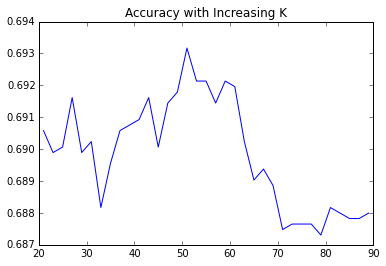

In [8]:
results = []
for n in range(21, 91, 2):
    clf = KNeighborsClassifier(n_neighbors=n,weights='distance',algorithm='auto')
    clf.fit(train[features], trainLabels['status_group'])
    preds = clf.predict(test[features])
    accuracy = np.where(preds==testLabels['status_group'], 1, 0).sum() / float(len(test))
    #print "Neighbors: %d, Accuracy: %3f" % (n, accuracy)
 
    results.append([n, accuracy])

results = pd.DataFrame(results, columns=["n", "accuracy"])

plt.plot(results.n, results.accuracy)
plt.title("Accuracy with Increasing K")
plt.show()

In [31]:
print clf.predict_proba(test[features])

[[ 0.90090996  0.02149957  0.07759046]
 [ 0.64791557  0.01630249  0.33578194]
 [ 0.53760758  0.08828581  0.37410662]
 ..., 
 [ 0.51515503  0.29372389  0.19112107]
 [ 0.53723527  0.04761919  0.41514554]
 [ 0.60515664  0.04413806  0.3507053 ]]


In [19]:
preds

array(['functional', 'functional', 'functional', ..., 'functional',
       'non functional', 'non functional'], dtype=object)

In [20]:
len(df)

59400